In [1]:
import pandas as pd
df = pd.read_csv("IMDB Dataset.csv")

In [2]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


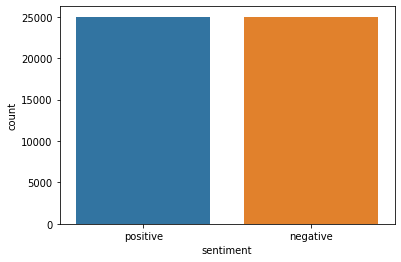

In [4]:
import seaborn as sns
sns.countplot(x="sentiment", data=df)

In [5]:
df['Length'] = df['review'].apply(len)

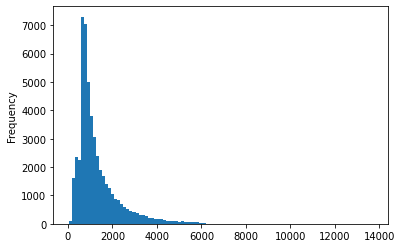

In [6]:
df['Length'].plot(bins=100, kind='hist') 

In [7]:
df["Length"].describe()

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: Length, dtype: float64

In [9]:
df[df['Length'] == 1309]['review'].iloc[0]

'Patricia Arquette plays American doctor Laura Bowman, who takes a holiday to Burma in an attempt to heal her spirit after the murders of her husband and young son. She is left behind in Rangoon during a military crackdown and leaves the city with an aging man who works as a "tour guide." But he is no simple tour guide; he is a professor who introduces her to the life outside of the tourist traps ... the two of them get caught up in the political upheaval and Laura sees with her own eyes how the government betrays and oppresses its own people.<br /><br />This movie is one of my favorites because of its themes. First, it\'s informational (describing some of the injustices that are occurring in Burma). Secondly, it\'s about a woman\'s struggle to find meaning in life after an incredible loss. Thirdly, it\'s about compassion and sacrifice, and people coming together - without even knowing each other - to endure pain and fear.<br /><br />Just about every beautiful scene in this movie is im

In [10]:
df[df['Length'] == 32]['review'].iloc[0]

'Read the book, forget the movie!'

In [11]:
df[df['Length'] == 13704]['review'].iloc[0]

'Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, bu

In [12]:
sentences = df['review'].tolist()
sentences_string = " ".join(sentences)

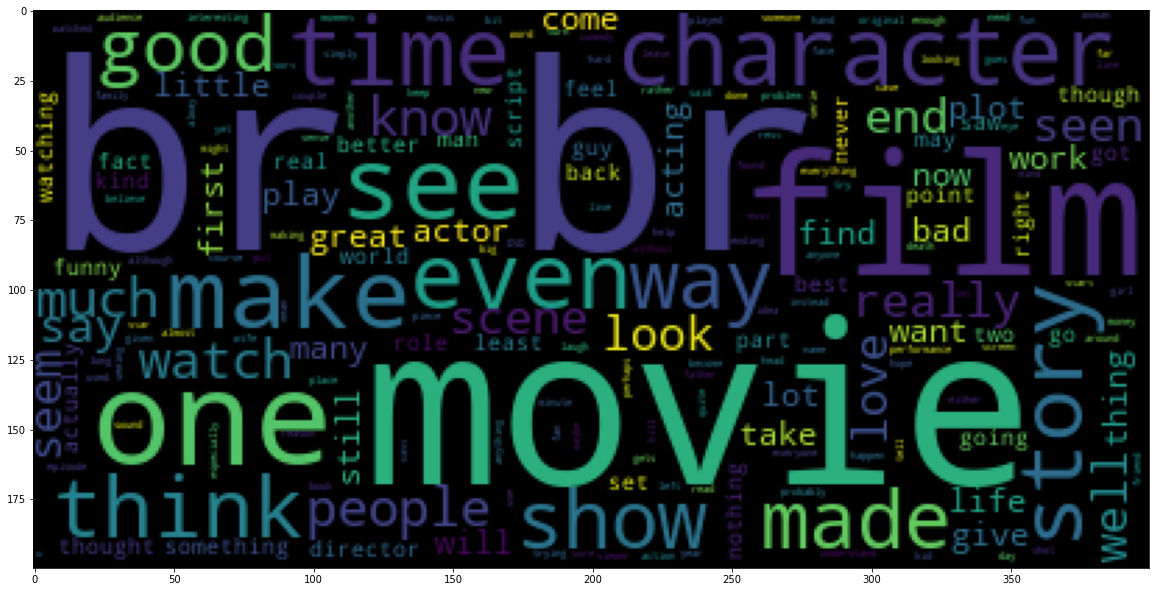

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_string))

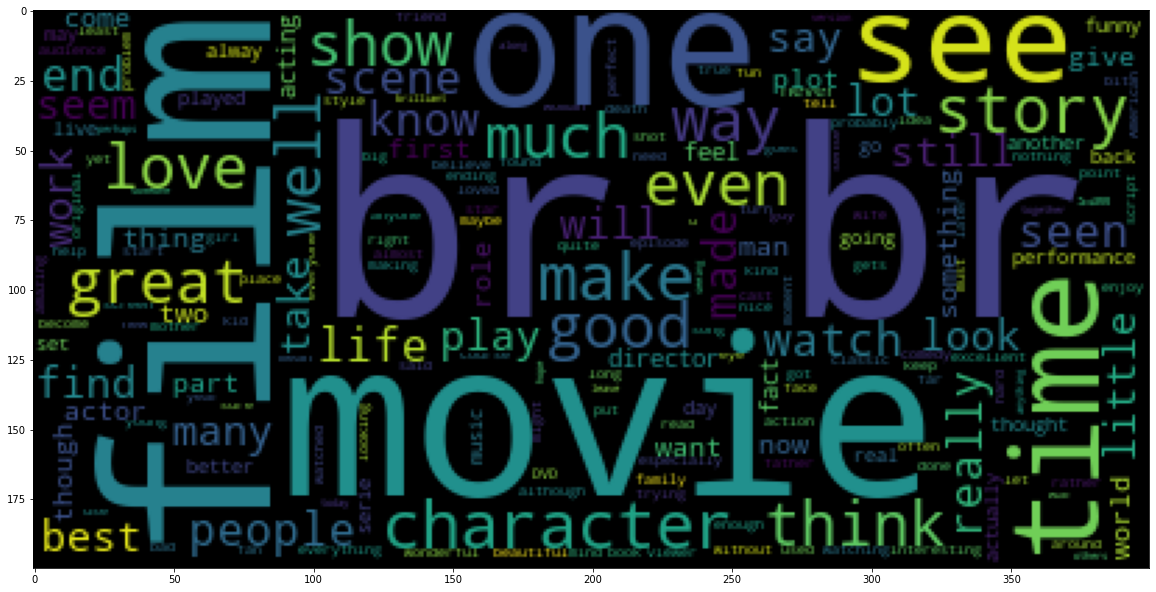

In [14]:
sentences = df[df['sentiment'] == 'positive']['review'].tolist()
sentences_string = " ".join(sentences)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_string))

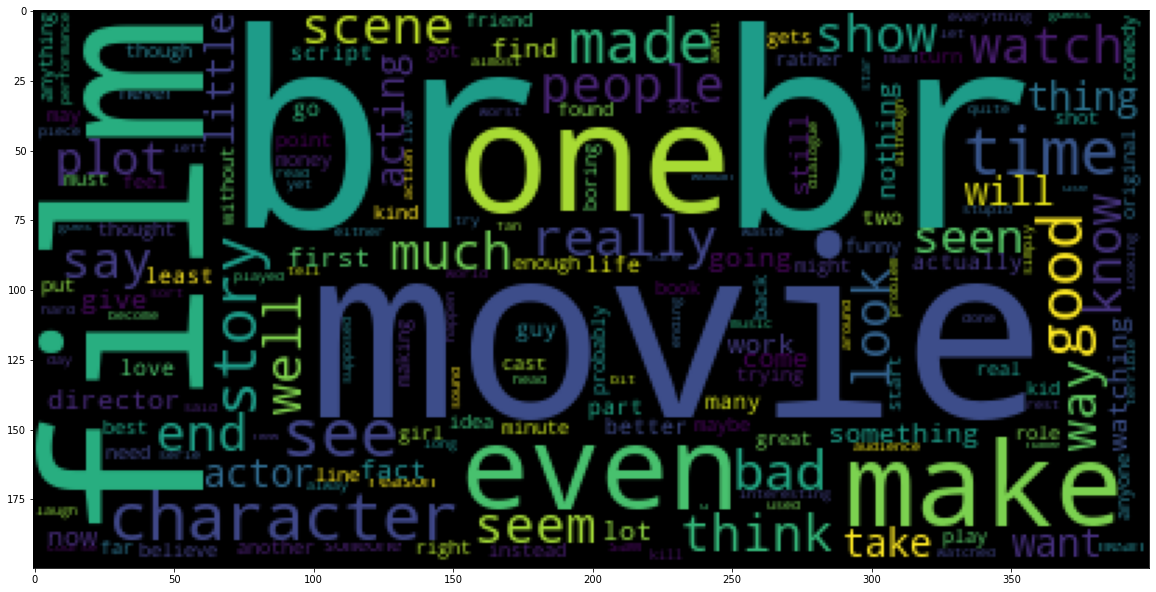

In [15]:
sentences = df[df['sentiment'] == 'negative']['review'].tolist()
sentences_string = " ".join(sentences)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_string))

In [16]:
import re
import string
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords

def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    text = ' '.join(text)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vkatz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
df['review'] = df['review'].apply(preprocessor)

In [18]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

tfidf = TfidfVectorizer(strip_accents=None,
                       lowercase=False,
                       preprocessor=None,
                       tokenizer=tokenizer_porter,
                       use_idf=True,
                       norm="l2",
                       smooth_idf=True)

le = LabelEncoder()
y = le.fit_transform(df["sentiment"].values)
X = tfidf.fit_transform(df["review"])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.5, shuffle=False)

In [23]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv = 5, 
                           scoring = "accuracy", 
                           random_state =0, 
                           n_jobs=-1, 
                           verbose = 3,
                           max_iter = 300).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   48.3s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


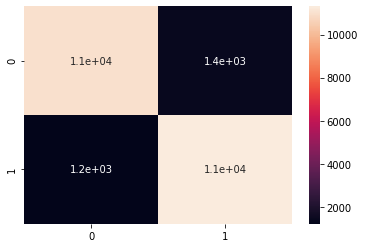

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [25]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     12474
           1       0.89      0.90      0.89     12526

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



In [26]:
import numpy as np
np.mean(y_test == y_predict_test)

0.89332

In [27]:
cm

array([[11024,  1450],
       [ 1217, 11309]], dtype=int64)